In [1]:
## Install TensorflowJS
!pip install TensorflowJS

     |████████████████████████████████| 61kB 2.0MB/s 
     |████████████████████████████████| 17.3MB 8.5MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 256kB 56.7MB/s 
     |████████████████████████████████| 890kB 44.9MB/s 
     |████████████████████████████████| 645kB 46.0MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32853 sha256=de95b50fca1baa9f38dae9fd90e54fe17574c7b1c42899d4f80e624294073629
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.11.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3984600945701505263
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3103932641649725592
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 18290786203358999222
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13863588486861856113
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [4]:
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
train = fashion_mnist.train
test = fashion_mnist.test

In [0]:
types = {
    '0': 'T-shirt/top',
    '1': 'Trouser',
    '2': 'Pullover',
    '3': 'Dress',
    '4': 'Coat',
    '5': 'Sandal',
    '6': 'Shirt',
    '7': 'Sneaker',
    '8': 'Bag',
    '9': 'Ankle boot'
}

In [0]:
import matplotlib.pyplot as plt

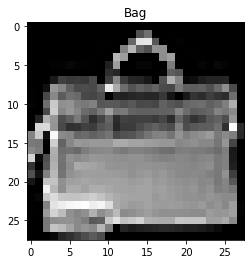

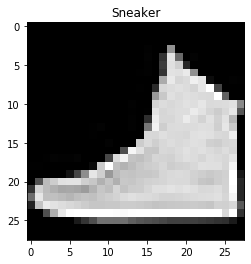

In [8]:
# Show images and labels
index = 201
plt.imshow(train.images[index].reshape(28,28), cmap='gist_gray')
plt.title(types[str(train.labels[index])])
plt.show()

plt.imshow(train.images[23].reshape(28,28), cmap='gist_gray')
plt.title(types[str(train.labels[23])])
plt.show()

In [0]:
#Reshaping train and test set
X_train, X_test = train.images, test.images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train= X_train/32
X_test = X_test/32

In [0]:
Y_train, Y_test = train.labels, test.labels

In [11]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', Y_test.shape)

X_train shape:  (55000, 28, 28, 1)
y_train shape:  (55000,)
X_test shape:  (10000, 28, 28, 1)
y_test shape:  (10000,)


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D,MaxPool2D
from keras.optimizers import RMSprop
class CnnIsFakeModel():
    # tuning parameter is defined within the __init__ for the sake of simplicity
    def __init__(self, inputshape):
        model = Sequential()

        model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                         activation ='relu', input_shape = (28,28,1)))
        model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                         activation ='relu'))
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Dropout(0.25))


        model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'))
        model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu'))
        model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
        model.add(Dropout(0.25))


        model.add(Flatten())
        model.add(Dense(512, activation = "relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(10, activation = "softmax"))
        optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
        model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
        self.model = model
    
    def getModel(self):
        return self.model
        

Using TensorFlow backend.


In [13]:
myCNN = CnnIsFakeModel((28,28,1))
myCNN.getModel().summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928    

In [0]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [15]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
myCNN = CnnIsFakeModel((28,28,1))
myCNN.getModel().fit(X_train,Y_train,
                              epochs = 40, validation_data = (X_test,Y_test),
                              verbose = 1, batch_size=512
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 10000 samples
Epoch 1/40





55000/55000 [==============================] - 14s 263us/step - loss: 0.7046 - acc: 0.7446 - val_loss: 0.8670 - val_acc: 0.7202
Epoch 2/40
55000/55000 [==============================] - 7s 130us/step - loss: 0.4369 - acc: 0.8420 - val_loss: 0.5226 - val_acc: 0.8035
Epoch 3/40
55000/55000 [==============================] - 7s 130us/step - loss: 0.3634 - acc: 0.8686 - val_loss: 0.3911 - val_acc: 0.8626
Epoch 4/40
55000/55000 [==============================] - 7s 131us/step - loss: 0.3222 - acc: 0.8831 - val_loss: 0.3811 - val_acc: 0.8763
Epoch 5/40
55000/55000 [==============================] - 7s 130us/step - loss: 0.2970 - acc: 0.8906 - val_loss: 0.3413 - val_acc: 0.8736
Epoch 6/40
55000/55000 [==============================] - 7s 131us/step - loss: 0.2763 - acc: 0.8981 - val_loss: 0.4046 - val_acc: 0.8318
Epoch 7/40
55000/55

In [0]:
imgString = 'iVBORw0KGgoAAAANSUhEUgAAABwAAAAcCAYAAAByDd+UAAABTUlEQVRIS+2VsU7DQAyGf0vpxgAbPAIDQyUGmBCKT+pbATPPwMzIA8RD9i7dWBmQOjIwcpHRoUQ60rvchYhIFXS93/4c279LmPlHM/PwD0x23BhzparXTigit6mAaEuZWVPB7l1VX4noodXetOBo3uADMz8BuBCRkxyor+kKFZFg7hhQYwE5BTiotXZR17Xt63eAxphHVV2JyFFO8pjGQUNF7wBjwrFwZn4DcNiH/hrQFcjMWwDHPvQbsB24FZFFGzBpliFo6AvfARxYa0+LongmomVVVZvcloa21B9TbEs/ABQA7nIN3RXk+XcjIktmXgM479o6eEuZ+ety5FwQH+iS98Hd+yCwLMsVEd2LyNmYlg55OPlvMdYmKf0fB05ZmtjMU0uzbZrmsq7rl1mWJrUAoSJSMSkfjj5t+wfMnZ2vm2T8nwCHYpLG33vgJ2jZyB1Ob2O6AAAAAElFTkSuQmCC'

In [0]:
from keras.preprocessing import image

In [0]:
from io import BytesIO
import base64
import numpy as np

In [19]:
img = image.load_img(BytesIO(base64.b64decode(imgString)), target_size=(28, 28), grayscale=True) 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [20]:
type(img)

PIL.Image.Image

In [21]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = myCNN.getModel().predict_classes(images, batch_size=10)
print(classes)

[4]


In [0]:
# Save model
myCNN.getModel().save('keras.h5')

In [0]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

In [27]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [0]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [0]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

In [31]:
# Prepare and Download model
!cp class_names.txt model/class_names.txt
!zip -r model.zip model 
from google.colab import files
files.download('model.zip')

  adding: model/ (stored 0%)
  adding: model/group1-shard2of2.bin (deflated 7%)
  adding: model/group1-shard1of2.bin (deflated 7%)
  adding: model/model.json (deflated 84%)
  adding: model/class_names.txt (deflated 4%)
